## First Part of Galaxy zoo exercice, from Kaggle

### Import des différentes librairies

In [40]:
## Differrents libs for the project 
import random
import pandas as pd
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


### Import de la data 

In [41]:
train_set = pd.read_csv('training_solutions_rev1.csv')
img_path = "images_training_rev1/"
files = os.listdir(img_path)

train_set.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [43]:
##Combien y-a-t-il d'exemples ? Quelles sont les classes ? Sont-elles équilibrées ?
train_set.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


# On divise le dataset en 3 classe préalablement observées 
-Smooth <br>
-Disk <br>
-Artefact <br>

In [30]:
sample1 = train_set.sort_values(by='Class1.1', ascending=False).head(100).copy()
sample2 = train_set.sort_values(by='Class1.2', ascending=False).head(100).copy()
sample3 = train_set.sort_values(by='Class1.3', ascending=False).head(100).copy()

## Global vizualize on differents classes
#### controle  des différents samples, et dimensions images 

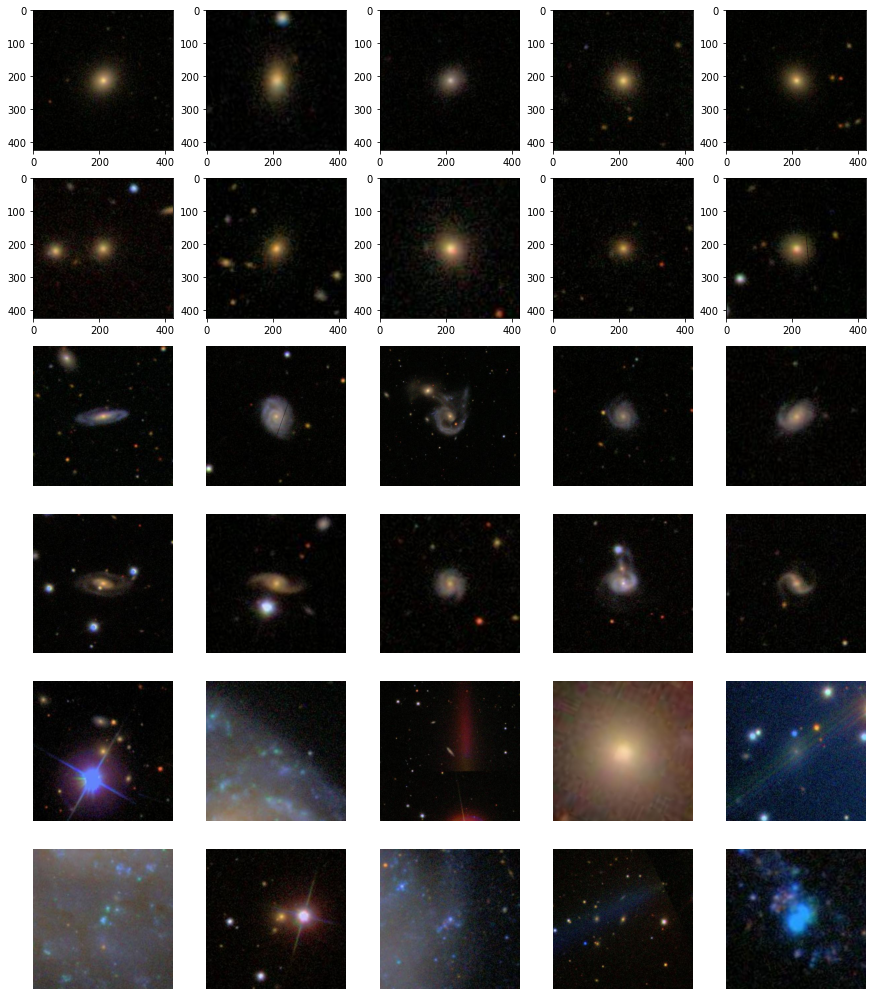

In [31]:
fig = plt.figure(figsize=(15,18))
    
for i in range(10):
    fig.add_subplot(6,5,i+1)
    n = random.randint(0,99)
    plt.imshow(Image.open(img_path+'/'+str(sample1.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+11)
    n = random.randint(0,99)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample2.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+21)
    n = random.randint(0,99)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample3.GalaxyID.values[n])+'.jpg'))

## Preprocessing

### Travail sur les images 
#### Import via la lib pathlib, puis création de X et y, croping et resize des images 

In [96]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
CUR_DIR = Path.cwd()
img_dir = CUR_DIR/"images_training_rev1"

In [34]:
## on vient parcourir les éléments du dossier pour vérifier l'extension de fichier ".jpg"
files_img = [f for f in img_dir.iterdir() if str(f).endswith(".jpg")]

In [51]:
##On vient classer les image dans l'ordre afin de les parcourir et les associer ensuite au différentes classes en faisant un test sur leur nom 
files_img = sorted(files_img)

In [52]:
##ON vérifie la len 
len(files_img)

61578

### Création de X et y 
#### On parcours files_img avec une incrémentation, on réalise pour chaque itération un test de correspondance entre le nom de fichier img, et la colonne "galaxyID".
#### On réalise le resize, et le crope dans la même boucle afin de ne conserver que l'essentiel de l'image.

In [53]:
X =[]
y=[]
index =0
for i in range(len(files_img)): 
    index+=1
    name = np.int64(files_img[i].stem)
    d = train_set.iloc[i:index,:4]
    if name in d["GalaxyID"].values:
        img = cv2.imread(str(files_img[i]))
        croped_img = img[106:319,106:319]
        m = cv2.resize(croped_img, (32,32), interpolation=cv2.INTER_LINEAR)
        m = np.reshape(m,(-1))
        X.append(m)
        t = d[['Class1.1', 'Class1.2', 'Class1.3']]
        t = np.array(t)
        y.append(t[0])
X = np.array(X)
y = np.array(y)

#### Il faut modifier le shape au préalable, afin de pouvoir faire une ACP par la suite 

#### on vérifie le shape de sortie ...

In [54]:
X.shape, y.shape

((61578, 3072), (61578, 3))

#### Cette fonction permet d'identifier la classe qui a la plus forte probabilité d'être cette classe là 

In [55]:
def getClass(line) :
    if (line[0] >= line[1]) & (line[0] >= line[1]) :
        return 0
    if (line[1] >= line[0]) & (line[1] >= line[2]) :
        return 1
    if (line[2] >= line[0]) & (line[2] >= line[1]) :
        return 2

#### On créer un dataframe  contenant les labels de chaque image.

In [56]:
Y_cla = pd.DataFrame()
Y_cla['Class'] = [str(getClass(y[i])) for i in range(len(y))]
Y_cla.head()

,Class
0,1
1,1
2,0
3,0
4,0


In [57]:
## Decoupage en échantillon de train test 
X_train, X_test, y_train, y_test = train_test_split(X, Y_cla, test_size=0.33, random_state=42)

In [58]:
##On vérifie le nbre de dimensions du X_train
X_train.shape

(41257, 3072)

In [59]:
# standardisation
obj_scaler = StandardScaler()
X_train_SC = obj_scaler.fit_transform(X_train)

In [60]:
X_test_SC = obj_scaler.transform(X_test)

### On pratique l'analyse en composante principale 

In [90]:
# On peut faire une ACP la question c'est comment on choisit le nombre de composantes
# Une manière simple et empirique est de tester sur une partie du dataset puis généraliser
pca = PCA()
pca.fit(X_train_SC)

cumsum = np.cumsum(pca.explained_variance_ratio_)
nb_dim = np.argmax(cumsum >= 0.95) + 1

print("Nombre de composants expliquant 95% de la variance :", nb_dim)

Nombre de composants expliquant 95% de la variance : 675


In [91]:
pca = PCA(675)
pca_X_train_SC = pca.fit_transform(X_train_SC)
pca_X_test_sc = pca.transform(X_test_SC)

In [92]:
pca_X_train_SC.shape, pca_X_test_sc.shape

((41257, 675), (20321, 675))

## Entrainement du modèle avec et sans acp 

In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Training du modèle avec ACP (via pca_X_train_SC, et y_train)

In [93]:
##entrainement du model -- >  Version AVEC Acp 
xgb_model_pca = xgb.XGBClassifier()
xgb_model_pca.fit(pca_X_train_SC, y_train)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[11:51:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
# make predictions for test data
y_pred = xgb_model_pca.predict(pca_X_test_sc)

In [95]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.53%


### Training du modèle sans ACP (via X_train, et y_train)

In [80]:
##entrainement du model -- >  Version SANS ACP 
### fit model no training data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[11:14:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)


In [89]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.24%


### Matrix de confusion 

In [99]:
confusion_matrix(y_test, y_pred)

array([[6464, 2369,    0],
       [1988, 9494,    0],
       [   1,    5,    0]])